# Learning NumPy with computer vision - 2
The last notebook familarized you with basic numpy functionalities. Now let's move on to something more practical - images. What do images have to do with numpy? Well, quite a lot actually if you consider that an image is a two dimensional grid of pixel values. A grayscale image of dimesions 512x512 can easily be represented by a numpy array of shape 512x512. Can you think of the dimensions of an RGB image? 

In order to work with images we need an additional library called scikit-image. You can use it by running the code below. But first, install scikit-image by running `conda install sckit-image` or `pip install scikit-image`

In [1]:
import skimage

sckikit image comes with a bunch of example images, for example the astronaut. You can check the available images here: https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py


------------
#### Exercise 1: Load the astronout image and output it's shape, datatype and the 100x100 values in the upper left corner. Draw both the whole image and the top left corner using matplotlib's imshow function.  

In [2]:
# Ex1: your code goes here

# skimage.data.astronaut()

uint8 (512, 512, 3) [[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  ...
  [174 171 174]
  [175 172 170]
  [175 172 171]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  ...
  [178 175 180]
  [175 172 171]
  [178 175 175]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  ...
  [177 176 180]
  [179 177 179]
  [177 174 174]]

 ...

 [[ 55  40 111]
  [ 53  39 109]
  [ 51  38 105]
  ...
  [184 172 168]
  [184 176 169]
  [183 176 170]]

 [[ 58  41 116]
  [ 57  44 116]
  [ 55  41 112]
  ...
  [184 177 169]
  [182 175 166]
  [184 174 167]]

 [[ 58  42 117]
  [ 59  44 119]
  [ 58  44 114]
  ...
  [189 178 173]
  [185 175 171]
  [187 176 174]]]


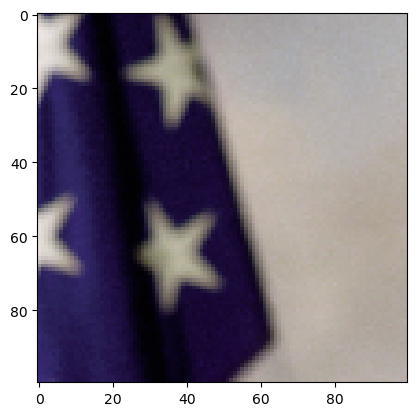

In [3]:
# Ex1: solution

img_arr = skimage.data.astronaut()
print(img_arr.dtype, img_arr.shape, img_arr[:100, :100])
import matplotlib.pyplot as plt

plt.imshow(img_arr)
plt.imshow(img_arr[:100, :100])

------------
#### Exercise 2: Output the minimum-, maximum-, and mean pixel values of the astronout image. Hint: google the respective numpy functions if you need to!

In [4]:
# Ex2: your code goes here


In [5]:
# Ex2: solution

print(img_arr.min(), img_arr.max(), img_arr.mean())

0 255 114.59900410970052


-------
#### Exercise 3: Load the 'camera' sample data from skimage.data and display it using imshow. Which shape does the image have and how is it different from the astronaut image? Convert the image to RGB format (i) using the numpy.stack function and (ii) using numpy.concatenate. How does the functionlity of these functions differ from one another? Hint: Check the shape of the RGB astronaut image again.

In [6]:
# Ex3: your code goes here


(512, 512, 3)
(512, 512, 3)


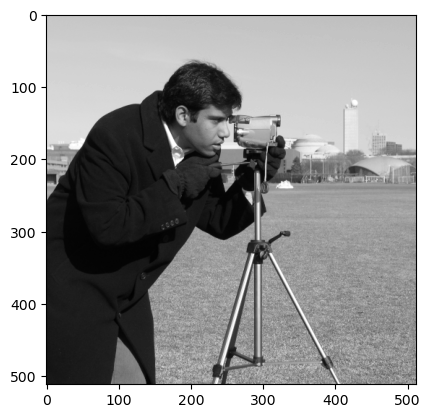

In [7]:
# Ex3: solution
import numpy as np

img2_arr = skimage.data.camera()
plt.imshow(img2_arr, cmap='gray')

# i
img2_rgb = np.stack([img2_arr,img2_arr,img2_arr], axis=2)
print(img2_rgb.shape)

# ii
img2_arr = skimage.data.camera()
img2_arr = img2_arr[:, :, np.newaxis]
img2_rgb = np.concatenate([img2_arr,img2_arr,img2_arr], axis=2)
print(img2_rgb.shape)

------------
#### Exercise 4: Load the 'camera' sample data from skimage.data again and display it using imshow. Threshold the image such that pixels below a certain threshold are set to 0 (black)  and above are set to 255 (white). Save the thresholded image inside a variable and display it.

In [8]:
# Ex4: your code goes here




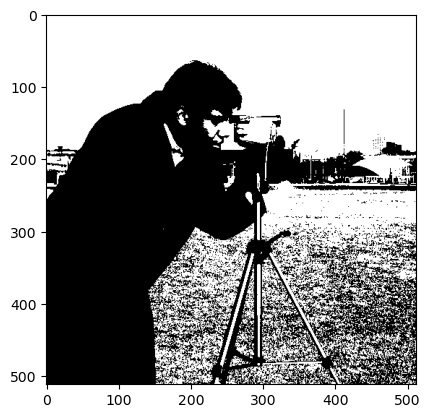

In [9]:
# Ex4: solution
img = skimage.data.camera()
plt.imshow(img, cmap='gray')

thr_img = img >150

plt.imshow(thr_img, cmap='gray')

--------
#### Exercise 5: Instead of using an explicit threshold like above, we can use a predefined threshold function that finds the optimal thresholding value. Lookup the use of skimage.filters.threshold_otsu and use it for threshholding the 'camera' image.

In [10]:
# Ex 5: your code goes here 


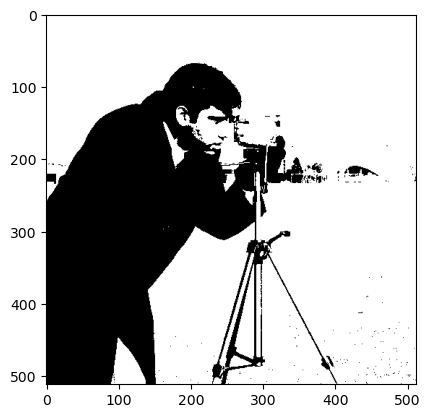

In [11]:
# Ex5: solution
from skimage  import filters

best_thr = filters.threshold_otsu(img)
thr_img = img >best_thr

plt.imshow(thr_img, cmap='gray')

--------
#### Exercise 6: Lookup the famous 'Hope' poster of Barack Obama. Thiis illustration is composed of a set of regions that share the same color. Can you use the binary_closing a perhaps other skimage.morphology / skimage.filters methods to produce an image that has clearly seperated black and white regions?

In [12]:
# Ex 6: your code goes here


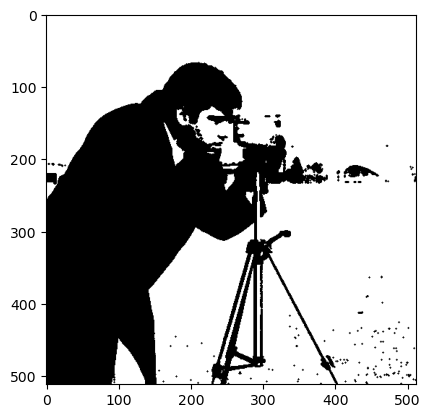

In [13]:
# Ex 6: solution
from skimage import morphology

closed_img = morphology.binary_closing(thr_img)
closed_img = morphology.erosion(thr_img)

plt.imshow(closed_img, cmap='gray')

--------
A black and white image can be seen as a boolean array of True and False values. This is commonly referred to as a mask. Why? Because we can put this boolean array on another image of the same dimesion to select the mask specific region. This might sound a bit  abstract. Let's see a simple mask example in  practise. A mask can be used similar to slices or indexes that we saw before: `arr[arr_mask]`. Go through the examples below.


In [14]:
arr = np.array([[11, 4, 55],
                [22, 5, 66],
                [33, 6, 77],])

arr_mask = np.array([[True, True, True],
                     [False, False, False],
                     [False, True, False],])
output1 = arr[arr_mask]

output2 = arr.copy()
output2[arr_mask] = -1

output3 = arr.copy()
output3[~arr_mask] += 1000

#### Exercise 7: Print out the three outputs from the cell above (`output1, output2, outpu3`) and infer how masking works in numpy. How does `output1` differ from the other two in terms of its shape? What does the `~` operator do?


In [15]:
# Ex 7: your code goes here


In [16]:
# Ex 7: solution
print(output1, output1.shape, end='\n\n')  # the masking output against a scaler is always a 1d array
print(output2, output2.shape, end='\n\n')  # the masking selection can be updated with new values
print(output3, output1.shape, end='\n\n')  # the masking selection can be inverted with the tilde operator
                                           # values can not only be replaced, but also math operations are possible

[11  4 55  6] (4,)

[[-1 -1 -1]
 [22  5 66]
 [33 -1 77]] (3, 3)

[[  11    4   55]
 [1022 1005 1066]
 [1033    6 1077]] (4,)



#### Exercise 8: Let's use masking in a real example. Load the camera image again and create an image mask using thresholding as done in exercise 5 and 6. The mask should be True where image values are larger than 120, and False where they are smaller. Use this mask to set the camera image values to 240 where the mask is True and display this image passing `cmap='gray'` to the imshow function. Can you explain the result?

In [17]:
# Ex 8: your code goes here


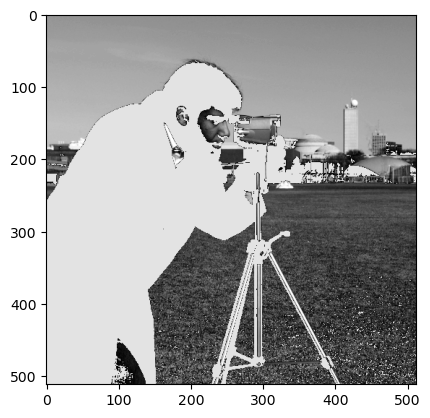

In [18]:
# Ex 8: solution
img = skimage.data.camera()
img_mask = img < 120
img[img_mask] = 240

plt.imshow(img, cmap='gray')

# Values smaller than 120 are True in the mask. These are dark pixels. Using this mask,
# we set the intensity of these pixels to a light gray, almost white. This is why the
# camera man appears in light gray.